This is an example notebook, which will go through an example of predicting categorical variables. Following along with the documentation might also prove to be helpful.
https://abcd-ml.readthedocs.io/en/latest/ABCD_ML_class_docs.html

# Init Phase

In [1]:
import ABCD_ML

# We will use a few extra libraries during this example
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Just defining all of the locations of data to be used at the start
base_dr = '/mnt/sdb2/'

data_dr = os.path.join(base_dr, 'ABCDFixRelease2p0p1')
rest_dr = os.path.join(base_dr, 'ABCD2p0NDA')

struc1 = os.path.join(data_dr, 'abcd_mrisdp101.txt')
struc2 = os.path.join(data_dr, 'abcd_mrisdp201.txt')

mid1 = os.path.join(data_dr, 'abcd_midabwdp01.txt')
mid2 = os.path.join(data_dr, 'abcd_midabwdp202.txt')

sst1 = os.path.join(data_dr, 'abcd_tfsstabwdp101.txt')
sst2 = os.path.join(data_dr, 'abcd_tfsstabwdp201.txt')

nback1 = os.path.join(data_dr, 'abcd_tfabwdp101.txt')
nback2 = os.path.join(data_dr, 'abcd_tfabwdp201.txt')

target1 = os.path.join(rest_dr, 'abcd_mri01.txt')
target2 = os.path.join(rest_dr, 'abcd_lt01.txt')

name_map_loc = os.path.join(data_dr, 'Fix Release Notes 2.0.1_Public',
                            '24. ABCD_Release_2.0.1_Updates', 'abcd_2.0.1_mapping.csv')

In [3]:
# Most of these params are default, but just as an example... 
ML = ABCD_ML.ABCD_ML(exp_name = 'Site',
                     log_dr = '',
                     existing_log = 'overwrite',
                     verbose = True,
                     notebook = True,
                     subject_id = 'src_subject_id',
                     eventname = 'baseline_year_1_arm_1',
                     use_default_subject_ids = True,
                     default_dataset_type = 'basic',
                     drop_nan = False,
                     default_na_values = ['777', '999'],
                     low_memory_mode = False,
                     random_state = 1)

exp_name = Site
log_dr = /home/sage/ABCD_ML/Examples
existing_log = overwrite
verbose = True
exp log dr setup at: /home/sage/ABCD_ML/Examples/Site
log file at: /home/sage/ABCD_ML/Examples/Site/logs.txt
notebook = True
default subject id col = src_subject_id
eventname = baseline_year_1_arm_1
use default subject ids = True
default dataset type = basic
default NaN values = ['777', '999']
low memory mode = False
random state = 1


ABCD_ML object initialized


One notably change in the above init of the object, is in setting drop_nan to False. This means rows with NaN values, will not be dropped by default.

# Data Loading Phase

Next, we will load a name mapping, which is simply saying, upon loading any data, if possible convert from the nda_name used to the deap_name. Nothing too fancy, but if there is a naming scheme one prefers...

In [4]:
ML.Load_Name_Map(loc = name_map_loc,
                 dataset_type = 'explorer',
                 source_name_col = 'nda_name',
                 target_name_col = 'deap_name')

Loading /mnt/sdb2/ABCDFixRelease2p0p1/Fix Release Notes 2.0.1_Public/24. ABCD_Release_2.0.1_Updates/abcd_2.0.1_mapping.csv assumed to be dataset type: explorer
Loaded map file


Following the roughly reccomended data loading order, we would load either Exclusions or Inclusions. With Load_Exclusions(), and Load_Inclusions(), respectively. We will skip those steps here.

When loading data (and covars ect...) it can be useful to set clear_existing to True if you are playing around with different settings. clear_existing = True, will clear any loaded data, whereas by default it is normally set to False, allowing the user to call Load_Data multiple times in order to load data from multiple sources.

Normally, with clear_existing=True, the user can just keep reloading the same notebook cell with different settings if desired, but for the purpose of an example, we will keep old runs.

A few other things to note, we pass loc = [data1, data2], which lets us load data from two locations at the same time. Because they are the same dataset type, we can just leave dataset_type as 'default' (which when initing the ML object, we set default as 'basic'), but if for example data2 was explorer type, we could pass dataset_type = ['default', 'explorer'].

For the rest of the parameters, we will begin very conservatively.

In [5]:
ML.Load_Data(loc = [struc1, struc2], 
             dataset_type = 'default',
             drop_keys = [],
             drop_nan = 'default',
             filter_outlier_percent = None,
             winsorize_val = None,
             unique_val_drop_thresh = 2,
             unique_val_warn_percent = 5,
             drop_col_duplicates = None,
             clear_existing = True)

Cleared loaded data.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_mrisdp101.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_mrisdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_mrisdp201.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_mrisdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Dropped 0 columns, per drop_keys argument
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 2892


The following columns have a questionable number of unique values (under the warn thresh of 576.7 ): 
smri_area_cort.destrieux_g.cingul.post.ventral.lh unique vals: 495
smri_area_cort.destrieux_g.front.inf.orbital.lh unique vals: 312
smri_area_cort.destrieux_g.ins.lg.and.s.cent.

A lot of diagnostic information is printed, so lets work through it quickly. 

-The raw datasets were both loaded with type = 'basic', so the columns ['collection_id', 'abcd_smrip101_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'smri_visitid', 'collection_title', 'study_cohort_name'] were dropped by default, which is what we want, as none of these are the data we want.

-0 columns were dropped for containing all NaN.

-Since we passed drop_nan = 'default' (and defined drop_nan default as False), we loaded 2892 rows with atleast one NaN. 

-It can be a waste to provide columns with not enough variance to ML models, so a few tools are built into the dataloader for catching columns with not enough unique values. By default, we just have it set to drop columns with actually no variance, or only 1 unique value, but this can be changed with the unique_val_drop_thresh. We also have a seperate warning threshold, which will simply alert us to any rows which might have a suspicious number of unique values, and might not be useful, but not drop them - only warn (and then if we decide to act and drop some, can either pass specific rows to drop_keys, or reset the unique_val_drop_thresh to be higher). In this case, lets just keep all of them.

-Lastly, we have some more in depth information printed about the remaining NaN values present within the data. What jumps out is that there 435 columns found with 617 missing values. This is a very good sign that there is some good reason for why data is missing, in this case, those 435 columns are share the strs ['cort.destrieux', 'smri_t2w.']), Therefore, we easily notice that a number of subjects do not a t2w scan. We can now add "_t2w" to our drop keys to remove these subjects

-Another thing that jumps out is that there are:
437 columns found with 4 missing values (column name overlap: ['_cort.destrieux_', 'smri_'])
To me this seems like it is because there are a few subjects included with a lot of missing data. What we can try is, instead of just setting drop_nan to False, we can set it to a specific threshold. Let's try setting it to .3, such that any subjects/rows with over half of there values missing will be dropped.


So, in this next round of loading we will just change drop_keys to include 't2w',
and try a new drop_nan val of .3

In [6]:
ML.Load_Data(loc = [struc1, struc2], 
             dataset_type = 'default',
             drop_keys = ['_t2w'],
             drop_nan = .3,
             filter_outlier_percent = None,
             winsorize_val = None,
             unique_val_drop_thresh = 2,
             unique_val_warn_percent = 5,
             drop_col_duplicates = None,
             clear_existing = True)

Cleared loaded data.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_mrisdp101.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_mrisdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_mrisdp201.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_mrisdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Dropped 453 columns, per drop_keys argument
Dropped 0 cols for all missing values
Dropped 4 rows for missing values, based on the provided drop_nan param: 0.3 with actual nan_thresh: 317
Loaded rows with NaN remaining: 2392


The following columns have a questionable number of unique values (under the warn thresh of 576.5 ): 
smri_area_cort.destrieux_g.cingul.post.ventral.lh unique vals: 495
smr

Okay great, now we went from having 284244 missing values to 2868, and from 1510 valid columns, to 1057. You'll see we also "Dropped 4 rows for missing values", so we did in fact have some subjects with a lot of missing values.

Next, another thing to consider when loading data is the usage of filter_outlier_percent and winsorize_val, which are both tools for handling large outliers in the data. filter_outlier_percent will explicitly drop subjects with a certain extreme column value, whereas winsorize_val will set that extreme value to a more reasonable one. In general, we would like to drop subjects with lots of extreme column values, as this means something went wrong with most if not all of their data, and winsorize when only a few columns/features show extreme values, as we would hope the rest of their data is still meaningful/true. 

In [7]:
# You can access loaded data as a pandas dataframe at ML.data
# ML.data.head()

The best way to detect if there is an outlier, or if you want to remove them or not is really outside the scope of this little example, one provided technique though is to view the distribution for a few random data points.

In [8]:
ML.Show_Data_Dist(plot_type='hist')

So the distribution actually looks pretty good here, if it didn't though, we could do some winsorization or...

Or instead we can do something a little fancier (maybe? or just stupid). We could use filter_outlier_percent which by default drops rows based on if a column has an extreme value outside of the range, but by setting drop_or_nan to nan, instead of dropping the whole row, we just set that specific extreme value to a nan (so like winsorizing, but instead we would replace the actual value with imputation later on).

The only problem with this technique is that now we have a lot more missing values to impute... and atleast one in every column - which means that if we want to use a more complicated imputation strategy then mean impution, it will take a Lonnnng time to run.

Let's now load in the task-fmri data, we are also going to notably clear our already loaded data so we can do the same thing as before and explore a little bit- so we just need to remember to re-load everything in the end once we are happy.

In [9]:
ML.Load_Data(loc = [nback1, nback2, mid1, mid2, sst1, sst2],
             clear_existing=True)

Cleared loaded data.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp101.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp201.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp01.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_midabwdp01_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp202.txt assumed to be dataset type: basic
dropped [

Okay this time around it is less clear that there is a pattern to the missing data, as anyone column doesn't have that many missing values, no more than 30 - so it seems more likely there are some bad subjects.

In [10]:
ML.Load_Data(loc = [nback1, nback2, mid1, mid2, sst1, sst2],
             drop_nan = .1,
             clear_existing=True)

Cleared loaded data.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp101.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp201.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp01.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_midabwdp01_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp202.txt assumed to be dataset type: basic
dropped [

Alright so what we have done is now dropped any subject with more than 384 missing values, making things look a lot better, lets take a peek at the distribution now.

In [11]:
ML.Show_Data_Dist(plot_type='hist')

This immediatly looks a lot worse, there are some very big outliers, so we will drop just a tiny fraction (equivilent to dropping the largest and smallest data point by each column), then winsorize and see how that looks.

In [12]:
ML.Load_Data(loc = [nback1, nback2, mid1, mid2, sst1, sst2],
             drop_nan = .1,
             filter_outlier_percent = .0001,
             winsorize_val = .001,
             clear_existing=True)

Cleared loaded data.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp101.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp201.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp01.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_midabwdp01_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp202.txt assumed to be dataset type: basic
dropped [

In [13]:
ML.Show_Data_Dist(plot_type='hist')

Now lets re-load what we had before as well

In [14]:
ML.Load_Data(loc = [struc1, struc2], 
             drop_keys = ['_t2w'],
             drop_nan = .3,
             unique_val_drop_thresh = 2,
             unique_val_warn_percent = 2)

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_mrisdp101.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_mrisdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_mrisdp201.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_mrisdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Dropped 453 columns, per drop_keys argument
Dropped 0 cols for all missing values
Dropped 4 rows for missing values, based on the provided drop_nan param: 0.3 with actual nan_thresh: 317
Loaded rows with NaN remaining: 2392

Loaded NaN Info:
There are: 2868 total missing values
24 columns found with 1 missing values (column name overlap: ['_cort.destrieux_', 'smri_'])
13 columns found with 2 missing values (column na

In [15]:
ML.Load_Targets(loc = target2,
                col_name = 'site_id_l',
                data_type = 'c',
                filter_outlier_percent = None,
                categorical_drop_percent = None)

Loading /mnt/sdb2/ABCD2p0NDA/abcd_lt01.txt assumed to be dataset type: basic
15493 subjects dropped for eventname
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_nan param: True with actual nan_thresh: 0
Loaded rows with NaN remaining: 0
loading: site_id_l
Found 22 categories
Final shape:  (11875, 22)

Total valid overlapping subjects = 7204

All loaded targets
0 : ['site_id_l_0', 'site_id_l_1', 'site_id_l_2', 'site_id_l_3', 'site_id_l_4', 'site_id_l_5', 'site_id_l_6', 'site_id_l_7', 'site_id_l_8', 'site_id_l_9', 'site_id_l_10', 'site_id_l_11', 'site_id_l_12', 'site_id_l_13', 'site_id_l_14', 'site_id_l_15', 'site_id_l_16', 'site_id_l_17', 'site_id_l_18', 'site_id_l_19', 'site_id_l_20', 'site_id_l_21']


This is a good example of where the eventname flag is useful as we are loading from a file with longitudinal data, so 15k rows were dropped due to wrong eventname.

In [16]:
ML.Load_Targets(loc = target1,
                col_name = ['mri_info_deviceserialnumber', 'mri_info_manufacturer'],
                data_type = ['c', 'c'],
                filter_outlier_percent = None,
                categorical_drop_percent = None)

Loading /mnt/sdb2/ABCD2p0NDA/abcd_mri01.txt assumed to be dataset type: basic
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_nan param: True with actual nan_thresh: 0
Loaded rows with NaN remaining: 0
loading: mri_info_device.serial.number
Found 29 categories
loading: mri_info_manufacturer
Found 3 categories
Final shape:  (11755, 32)
Merged with existing!
New combined shape: (11755, 54)

Total valid overlapping subjects = 7204

All loaded targets
0 : ['site_id_l_0', 'site_id_l_1', 'site_id_l_2', 'site_id_l_3', 'site_id_l_4', 'site_id_l_5', 'site_id_l_6', 'site_id_l_7', 'site_id_l_8', 'site_id_l_9', 'site_id_l_10', 'site_id_l_11', 'site_id_l_12', 'site_id_l_13', 'site_id_l_14', 'site_id_l_15', 'site_id_l_16', 'site_id_l_17', 'site_id_l_18', 'site_id_l_19', 'site_id_l_20', 'site_id_l_21']
1 : ['mri_info_device.serial.number_0', 'mri_info_device.serial.number_1', 'mri_info_device.serial.number_2', 'mri_info_device.serial.number_3', 'mri

So as this is only three features, versus the 800+ data features, we have a special function built in for examining the distributions exactly.

-- site_id_l --


,Original Name,Counts,Frequency
Internal Name,,,
site_id_l_0,site01,261.0,0.036230
site_id_l_1,site02,445.0,0.061771
site_id_l_2,site03,444.0,0.061632
site_id_l_3,site04,325.0,0.045114
site_id_l_4,site05,241.0,0.033454
site_id_l_5,site06,390.0,0.054137
site_id_l_6,site07,231.0,0.032066
site_id_l_7,site08,128.0,0.017768
site_id_l_8,site09,278.0,0.038590


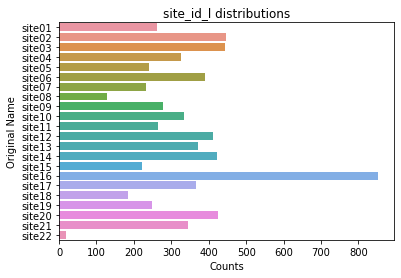


-- mri_info_device.serial.number --


,Original Name,Counts,Frequency
Internal Name,,,
mri_info_device.serial.number_0,HASH03db707f,265.0,0.036785
mri_info_device.serial.number_1,HASH11ad4ed5,366.0,0.050805
mri_info_device.serial.number_2,HASH1314a204,444.0,0.061632
mri_info_device.serial.number_3,HASH311170b9,241.0,0.033454
mri_info_device.serial.number_4,HASH31ce566d,37.0,0.005136
mri_info_device.serial.number_5,HASH3935c89e,852.0,0.118268
mri_info_device.serial.number_6,HASH48f7cbc3,18.0,0.002499
mri_info_device.serial.number_7,HASH4b0b8b05,212.0,0.029428
mri_info_device.serial.number_8,HASH4d1ed7b1,279.0,0.038728


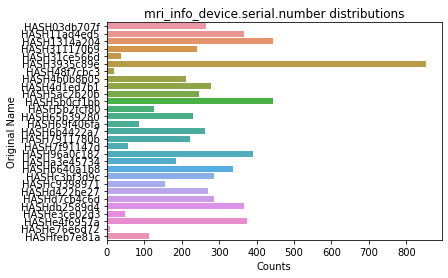


-- mri_info_manufacturer --


,Original Name,Counts,Frequency
Internal Name,,,
mri_info_manufacturer_0,GE MEDICAL SYSTEMS,1359.0,0.188645
mri_info_manufacturer_1,Philips Medical Systems,875.0,0.121460
mri_info_manufacturer_2,SIEMENS,4970.0,0.689895


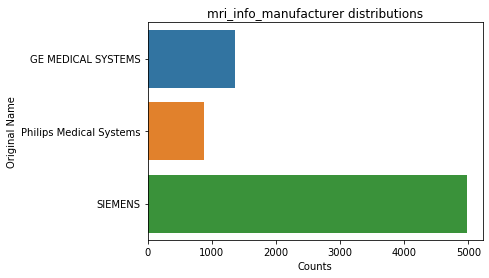

In [17]:
ML.Show_Targets_Dist()

Lets see if we can't get rid of some of the under 50 classes...

In [18]:
ML.Clear_Targets()

cleared targets.


In [19]:
ML.Load_Targets(loc = target2,
                col_name = 'site_id_l',
                data_type = 'c',
                categorical_drop_percent = .01)

Loading /mnt/sdb2/ABCD2p0NDA/abcd_lt01.txt assumed to be dataset type: basic
15493 subjects dropped for eventname
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_nan param: True with actual nan_thresh: 0
Loaded rows with NaN remaining: 0
loading: site_id_l
Dropping ['site22'] according to passed drop percent of 0.01
Found 21 categories
Final shape:  (11839, 21)

Total valid overlapping subjects = 7186

All loaded targets
0 : ['site_id_l_0', 'site_id_l_1', 'site_id_l_2', 'site_id_l_3', 'site_id_l_4', 'site_id_l_5', 'site_id_l_6', 'site_id_l_7', 'site_id_l_8', 'site_id_l_9', 'site_id_l_10', 'site_id_l_11', 'site_id_l_12', 'site_id_l_13', 'site_id_l_14', 'site_id_l_15', 'site_id_l_16', 'site_id_l_17', 'site_id_l_18', 'site_id_l_19', 'site_id_l_20']


In [20]:
ML.Load_Targets(loc = target1,
                col_name = ['mri_info_deviceserialnumber'],
                data_type = ['c'],
                categorical_drop_percent = .015)

Loading /mnt/sdb2/ABCD2p0NDA/abcd_mri01.txt assumed to be dataset type: basic
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_nan param: True with actual nan_thresh: 0
Loaded rows with NaN remaining: 0
loading: mri_info_device.serial.number
Dropping ['HASH31ce566d' 'HASH48f7cbc3' 'HASH69f406fa' 'HASH7f91147d'
 'HASHe3ce02d3' 'HASHe76e6d72'] according to passed drop percent of 0.015
Found 23 categories
Final shape:  (11227, 23)
Merged with existing!
New combined shape: (11227, 44)

Total valid overlapping subjects = 6952

All loaded targets
0 : ['site_id_l_0', 'site_id_l_1', 'site_id_l_2', 'site_id_l_3', 'site_id_l_4', 'site_id_l_5', 'site_id_l_6', 'site_id_l_7', 'site_id_l_8', 'site_id_l_9', 'site_id_l_10', 'site_id_l_11', 'site_id_l_12', 'site_id_l_13', 'site_id_l_14', 'site_id_l_15', 'site_id_l_16', 'site_id_l_17', 'site_id_l_18', 'site_id_l_19', 'site_id_l_20']
1 : ['mri_info_device.serial.number_0', 'mri_info_device.serial.number_

In [21]:
ML.Load_Targets(loc = target1,
                col_name = ['mri_info_manufacturer'],
                data_type = ['c'],
                filter_outlier_percent = None,
                categorical_drop_percent = None)

Loading /mnt/sdb2/ABCD2p0NDA/abcd_mri01.txt assumed to be dataset type: basic
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_nan param: True with actual nan_thresh: 0
Loaded rows with NaN remaining: 0
loading: mri_info_manufacturer
Found 3 categories
Final shape:  (11755, 3)
Merged with existing!
New combined shape: (11227, 47)

Total valid overlapping subjects = 6952

All loaded targets
0 : ['site_id_l_0', 'site_id_l_1', 'site_id_l_2', 'site_id_l_3', 'site_id_l_4', 'site_id_l_5', 'site_id_l_6', 'site_id_l_7', 'site_id_l_8', 'site_id_l_9', 'site_id_l_10', 'site_id_l_11', 'site_id_l_12', 'site_id_l_13', 'site_id_l_14', 'site_id_l_15', 'site_id_l_16', 'site_id_l_17', 'site_id_l_18', 'site_id_l_19', 'site_id_l_20']
1 : ['mri_info_device.serial.number_0', 'mri_info_device.serial.number_1', 'mri_info_device.serial.number_2', 'mri_info_device.serial.number_3', 'mri_info_device.serial.number_4', 'mri_info_device.serial.number_5', 'mri_info_

-- site_id_l --


,Original Name,Counts,Frequency
Internal Name,,,
site_id_l_0,site01,261.0,0.037543
site_id_l_1,site02,445.0,0.064010
site_id_l_2,site03,444.0,0.063867
site_id_l_3,site04,325.0,0.046749
site_id_l_4,site05,241.0,0.034666
site_id_l_5,site06,390.0,0.056099
site_id_l_6,site07,231.0,0.033228
site_id_l_7,site08,128.0,0.018412
site_id_l_8,site09,278.0,0.039988


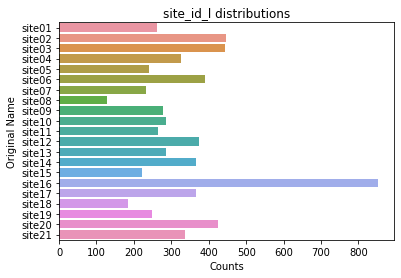


-- mri_info_device.serial.number --


,Original Name,Counts,Frequency
Internal Name,,,
mri_info_device.serial.number_0,HASH03db707f,265.0,0.038119
mri_info_device.serial.number_1,HASH11ad4ed5,366.0,0.052647
mri_info_device.serial.number_2,HASH1314a204,444.0,0.063867
mri_info_device.serial.number_3,HASH311170b9,241.0,0.034666
mri_info_device.serial.number_4,HASH3935c89e,852.0,0.122555
mri_info_device.serial.number_5,HASH4b0b8b05,212.0,0.030495
mri_info_device.serial.number_6,HASH4d1ed7b1,279.0,0.040132
mri_info_device.serial.number_7,HASH5ac2b20b,247.0,0.035529
mri_info_device.serial.number_8,HASH5b0cf1bb,444.0,0.063867


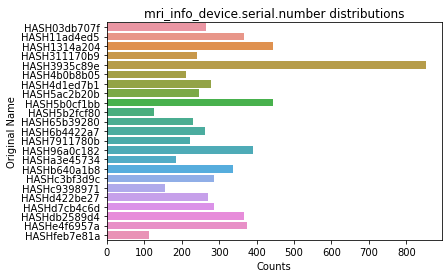


-- mri_info_manufacturer --


,Original Name,Counts,Frequency
Internal Name,,,
mri_info_manufacturer_0,GE MEDICAL SYSTEMS,1208.0,0.173763
mri_info_manufacturer_1,Philips Medical Systems,875.0,0.125863
mri_info_manufacturer_2,SIEMENS,4869.0,0.700374


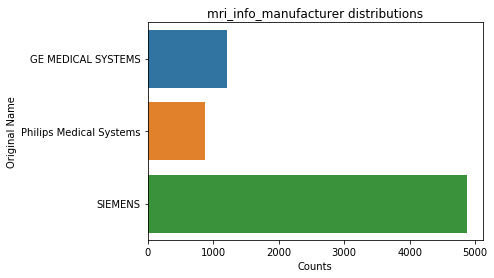

In [22]:
ML.Show_Targets_Dist()

### -- Brief advanced usage aside, customizing plotting! --

Let's take a quick break from all this loading, and discuss quickly how one might further customize any of the auto-magically generated plots. First of all, most of the plotting functions have a number of other potential user defined arguments, let's look at those first, and then how you could further take complete control.

In [23]:
help(ML.Show_Targets_Dist)

Help on method Show_Targets_Dist in module ABCD_ML._Plotting:

Show_Targets_Dist(targets='SHOW_ALL', cat_show_original_name=True, show_only_overlap=True, show=True) method of ABCD_ML.ABCD_ML.ABCD_ML instance
    This method displays some summary statistics about
    the loaded targets, as well as plots the distibution if possible.
    
    Parameters
    ----------
    targets : str or list, optional
        The single (str) or multiple targets (list),
        in which to display the distributions of. The str input
        'SHOW_ALL' is reserved, and set to default, for showing
        the distributions of loaded targets.
    
        (default = 'SHOW_ALL')
    
    cat_show_original_name : bool, optional
        If True, then when showing a categorical distribution (or binary)
        make the distr plot using the original names. Otherwise,
        use the internally used names.
    
        (default = True)
    
    show_only_overlap : bool, optional
        If True, then displays on

The important params here to note are, if we set cat_show_original_name to False, then the y-axis with our labels with show targets_1, targets_2 ect... instead of the original site name. 

Also, note there is a slight discrepency between the final loaded shape, (6369, 9),
and the number of subjects after computing the overlap with loaded Data and Covars of 6222. By default the function plots and shows info for only those 6222, but if we wanted to see it for the 6369, we would set show_only_overlap to False.

Lastly, we have show, which we need to set to False if we want to do some more advanced plotting. Let's see what the first two params do first, then move onto that.

-- site_id_l --


,Original Name,Counts,Frequency
Internal Name,,,
site_id_l_0,site01,391.0,0.034827
site_id_l_1,site02,551.0,0.049078
site_id_l_2,site03,631.0,0.056204
site_id_l_3,site04,739.0,0.065823
site_id_l_4,site05,377.0,0.033580
site_id_l_5,site06,584.0,0.052017
site_id_l_6,site07,339.0,0.030195
site_id_l_7,site08,345.0,0.030729
site_id_l_8,site09,431.0,0.038390


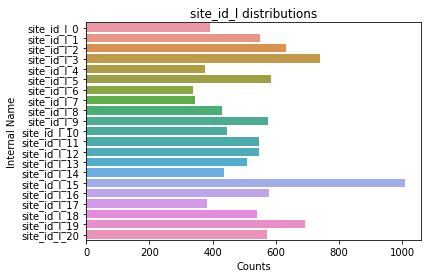

In [24]:
ML.Show_Targets_Dist(targets = 'site_id_l',
                     cat_show_original_name=False,
                     show_only_overlap=False)

Then, for much more customization, turn show off. This way we can interact directly with the matplot lib object.

-- site_id_l --


,Original Name,Counts,Frequency
Internal Name,,,
site_id_l_0,site01,261.0,0.037543
site_id_l_1,site02,445.0,0.064010
site_id_l_2,site03,444.0,0.063867
site_id_l_3,site04,325.0,0.046749
site_id_l_4,site05,241.0,0.034666
site_id_l_5,site06,390.0,0.056099
site_id_l_6,site07,231.0,0.033228
site_id_l_7,site08,128.0,0.018412
site_id_l_8,site09,278.0,0.039988


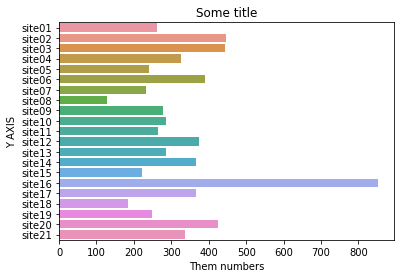

In [25]:
ML.Show_Targets_Dist(targets = 'site_id_l', show=False)
plt.title('Some title')
plt.xlabel('Them numbers')
plt.ylabel('Y AXIS')
# any other matplot lib commands
plt.show()

### -- fin --

Alright great, we now have now have still 7k subjects with data and all target variables!


On to loading Covars, well, name used roughly. These are just features which tend to come in more different types of data, and should potentially be pre-processed differently - In the end, they within the context of this framework, will just be passed as input along with the loaded neuroimaging ROI data.

There are a number of options when loading covars, for example, on how to encode categorical variables (as ordinal, dummy coded or one-hot encoded), or if you want to globally perform standardization or normalization (which might not be best practice... but for some ordinal variables say always between 1 and 5, one could easily justify globally pre-proc'ing, as the data leakage introduced later on is non-detrimental...). I mean to say, just be careful with choices made, just because something is an option does not mean it is the right option.

In [18]:
ML.Load_Covars(loc = struc1,
               col_name = 'interview_age',
               data_type = 'f',
               drop_nan = 'default',
               code_categorical_as = 'ordinal',
               categorical_drop_percent = None,
               filter_float_outlier_percent = None,
               standardize = False,
               normalize = False,
               clear_existing = True)

cleared covars.
Loading covariates!
Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_mrisdp101.txt assumed to be dataset type: basic
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 0
loading: interview_age
loaded shape:  (11534, 1)

Total valid overlapping subjects = 7204



Like targets, there is a special function built in for viewing covar distributions, either for all loaded (by default), or if there are a lot being used, a specific covar feature can be examined!

-- interview_age --


,interview_age
count,7204.000000
mean,119.418101
std,7.524929
min,107.000000
25%,113.000000
50%,120.000000
75%,126.000000
max,132.000000


Num. of unique vals: 26



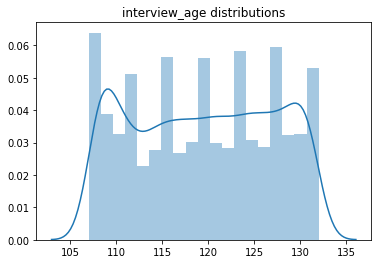

In [19]:
ML.Show_Covars_Dist()

This distribution seem fine, no big outliers or anything. We did not decide to standardize or normalize interview age though, so we will need to remember to do some sort of scaling on that later on.

The data loading phase is just about complete. We would now optionally Load_Strat(), which is for loading special stratification values. These would be useful if we were intrested in defining some sort of complex cross validation behavior, for example, retaining subjects with the same family id within the same train/test fold.
Strat values are also used potentially in defining split behavior within Evaluate, where the user can optionally perform left-out-CV on a loaded strat value. Further, loaded strat values can be used for special re-sampling behavior...

Let's load in sex as a strat value for an example.

In [28]:
ML.Load_Strat(loc = struc1,
              col_names = 'sex',
              binary_col_inds = 0)

Reading strat/stratification values!
Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_mrisdp101.txt assumed to be dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_nan param: True with actual nan_thresh: 0
Loaded rows with NaN remaining: 0

Total valid overlapping subjects = 6952

Removing non overlapping subjects


# Validation Phase

As briefly mentioned just before this, you can define special CV behavior which will be enforced across the main train/test split, and every internal train/validation split (for hypyerparam tuning, ect...). The options here are:
Defining 'groups' which will ensure everyone with the same groups value remains in the same fold, or defining 'statify' which will try to balance the distribution of stratify values between the train and test fold. 

In addition to either choosing one or neither of those, you can specify train_only subjects. Which will force certain subjects to always be placed within the training fold. For example, this behavior might be useful if you were worried about generating test statistics from subjects with missing data, but still wanted to if possible leverage their data during training.

We will also defining stratifying behavior over our target variable, and therefore ensure that each instances of train, test and validation folds will have roughly the same distribution of subjects from each site!

In [29]:
target_names = ['site_id_l', 'mri_info_device.serial.number', 'mri_info_manufacturer']
ML.Define_Validation_Strategy(stratify=target_names)

CV defined with stratifying behavior over 25 unique values.


,site_id_l,mri_info_device.serial.number,mri_info_manufacturer,Counts
0,site01,HASH6b4422a7,Philips Medical Systems,261
1,site02,HASH1314a204,SIEMENS,444
2,site02,HASHdb2589d4,Philips Medical Systems,1
3,site11,HASH03db707f,SIEMENS,265
4,site12,HASHe4f6957a,SIEMENS,374
5,site13,HASHc3bf3d9c,GE MEDICAL SYSTEMS,285
6,site14,HASH11ad4ed5,SIEMENS,366
7,site15,HASH7911780b,SIEMENS,222
8,site16,HASH3935c89e,SIEMENS,852
9,site17,HASHdb2589d4,Philips Medical Systems,366


Alas missing data can extend far and wide... 

In [32]:
ML.Define_Validation_Strategy(stratify=target_names, show_original=False)

CV defined with stratifying behavior over 25 unique values.


,site_id_l,mri_info_device.serial.number,mri_info_manufacturer,Counts
0,0,11,1,261
1,1,2,2,444
2,1,20,1,1
3,10,0,2,265
4,11,21,2,374
5,12,16,0,285
6,13,1,2,366
7,14,12,2,222
8,15,4,2,852
9,16,20,1,366


In [58]:
AHHHH1 = ((ML.targets['site_id_l_1'] == 1) & (ML.targets['mri_info_device.serial.number_20'] == 1))
AHHHH1_subject = ML.targets[AHHHH1 == True].index

AHHHH2 = ((ML.targets['site_id_l_7'] == 1) & (ML.targets['mri_info_device.serial.number_6'] == 1))
AHHHH2_subject = ML.targets[AHHHH2 == True].index

ML.targets = ML.targets.drop(AHHHH1_subject)
ML.targets = ML.targets.drop(AHHHH2_subject)

ML._process_new(True) # !!! This is neccisary is you want to make changes


Total valid overlapping subjects = 6950

Removing non overlapping subjects


If it were any more then 2 if would be good to be more progrmattic about it, but seriously AHHHHH

In [60]:
ML.Define_Validation_Strategy(stratify=target_names, show_original=True)

CV defined with stratifying behavior over 23 unique values.


,site_id_l,mri_info_device.serial.number,mri_info_manufacturer,Counts
0,site01,HASH6b4422a7,Philips Medical Systems,261
1,site02,HASH1314a204,SIEMENS,444
2,site11,HASH03db707f,SIEMENS,265
3,site12,HASHe4f6957a,SIEMENS,374
4,site13,HASHc3bf3d9c,GE MEDICAL SYSTEMS,285
5,site14,HASH11ad4ed5,SIEMENS,366
6,site15,HASH7911780b,SIEMENS,222
7,site16,HASH3935c89e,SIEMENS,852
8,site17,HASHdb2589d4,Philips Medical Systems,366
9,site18,HASHa3e45734,GE MEDICAL SYSTEMS,185


All better, the reason that table should be clear now.

In [ ]:
ML.Train_Test_Split(test_size=.2)

# Modeling Phase

Alright. Now we are on to the modeling or exploration phase, where the basic idea is to investigate different model pipelines, and choices of params on the training set. 

There are a lot of different options, and all sort of jammed into one function which can be a bit intimidating. To ease this, we can use Set_Default_ML_Params to set default values for all of the params used during the actual call to Evaluate, that we don't think we will be changing. All parameters accepted by Evaluate can be set as a default, and likewise, can be overriden when calling Evaluate just by passing a value.

In [ ]:
# Any params left out we just want as default
ML.Set_Default_ML_Params(problem_type = 'categorical',
                         metric = ['macro f1', 'macro average precision', 'macro roc auc'],
                         scaler = 'robust',
                         scaler_scope = 'all',
                         splits = 3,
                         n_repeats = 1,
                         search_splits = 3,
                         n_jobs = 8,
                         search_n_iter = 50)

As if those were not enough parameters for you... (but really, for the most part, you can leave most the ones above  as default, as they tend to add additional behavior),

There are some optional extra levels of verbosity during modelling to toggle True/False, on/off.

We will turn on all of them (except for logging) just to show it off? Or uh...

In [ ]:
ML.Set_ML_Verbosity(fold_name = True,
                    time_per_fold = True,
                    score_per_fold = True,
                    fold_sizes = True,
                    save_to_logs = False)

Now it comes to actually run some models - there are a ton of different options to explore, and different choices ect... as seen in defining some of the default params. The key is to start simple. That is typically, just make sure our input has some minor amount of scaling (as we set in default params), and then for our model, just try a linear one.

We can see the avaliable multiclass and mulilabel model options in the docs at
https://abcd-ml.readthedocs.io/en/latest/options.html#categorical-multiclass
or by calling ML.Show_Models().

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = "linear")

In [ ]:
hjk

As stated, there are a number of different choices we can play with:

- Type of model:
    
    This includes the actual model, e.g. logistic or elastic net, as well as different model_params, with  a grid or a random search for different hyper-parameters.


- Metrics:
    
    We have already defined 3 metrics to see the output of, but especially with a multiclass problem it might be useful to see by class metrics, or some other type. It always useful to examine multiple metrics to truly understand model performance.
    
    
- Choice of imputer:
    
    Right now, we are simply using the default settings for missing data imputation, which just involves mean imputation for float data and median for categorical. With imputer, imputer_scope and imputer_params you can set up more sophisticated strategies.
    
    
- Different scaling option:
    
    Rather then simply using the robust scaler on all of the data, we can optionally apply different types of scalers, or even a sequence of scalers, or add in hyperparameters to search over with scaler_params. In general scaling is an often over-looked step, but in same cases can improve performance.
    
    
- Resampling our data during training
    
    With the provided sampler, sample_on and sampler_params options, we can play with a number of resampling, both under and oversampling, designed to help combat class imbalanced. These range from simple techniques like randomly oversampling minority classes and undersampling majority classes, to creating synthetic data points. We can also sample on not just target varaible imbalances, but any variable loaded in strat (or a combination). For example, if we loaded race information into strat, we could resample such that under-represented races were given equal representation when training the classifier - there is a whole realm of possibilities to explore here!
    
    
- Front-end feature selection
    
    A potentially useful strategy for working with a large number of features is to perform some sort of feature selection. The parameters provided in feat_selector and feat_selector_params let us try a few different options here, and can be easily added into the hyperparameter search space.
    

- Ensembles of models: 
    
    Simmilar to model type, we can explore ensembles of models with ensemble and ensemble_params, allowing for anything from just averaging the predictions from a list of models, to creating an ensemble via bagging on a single classifier (all the way to fitting meta estimator's with another left out portion of the data).
    
    
The above represent most of the actual "modelling itself", or nuts and bolts of the model pipeline that you can put together, but there are some additional interesting things to try!

- 

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                        metric = ['micro f1', 'by class roc auc'],
                        feats_to_use = ['covars', '.lh'],
                        subjects_to_use = ('sex', 0)          
                        )

In [ ]:
hjghj

In [ ]:
raw_preds

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'elastic',
                         model_params = 1,
                         search_type = 'random')

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
            model_params = 1,
            search_type = 'random')